In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from probes import AttentionProbe
from model import TinyBertModel

/home/chandan/environments/research/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = TinyBertModel()
probe = AttentionProbe(model)

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


torch.Size([1, 2, 9, 9]) torch.Size([1, 2, 9, 64]) torch.Size([1, 2, 9, 64])
torch.Size([1, 2, 9, 9]) torch.Size([1, 2, 9, 64]) torch.Size([1, 2, 9, 64])
Tokens: ['[CLS]', 'the', 'cat', 'sat', 'on', 'the', 'chair', '.', '[SEP]']


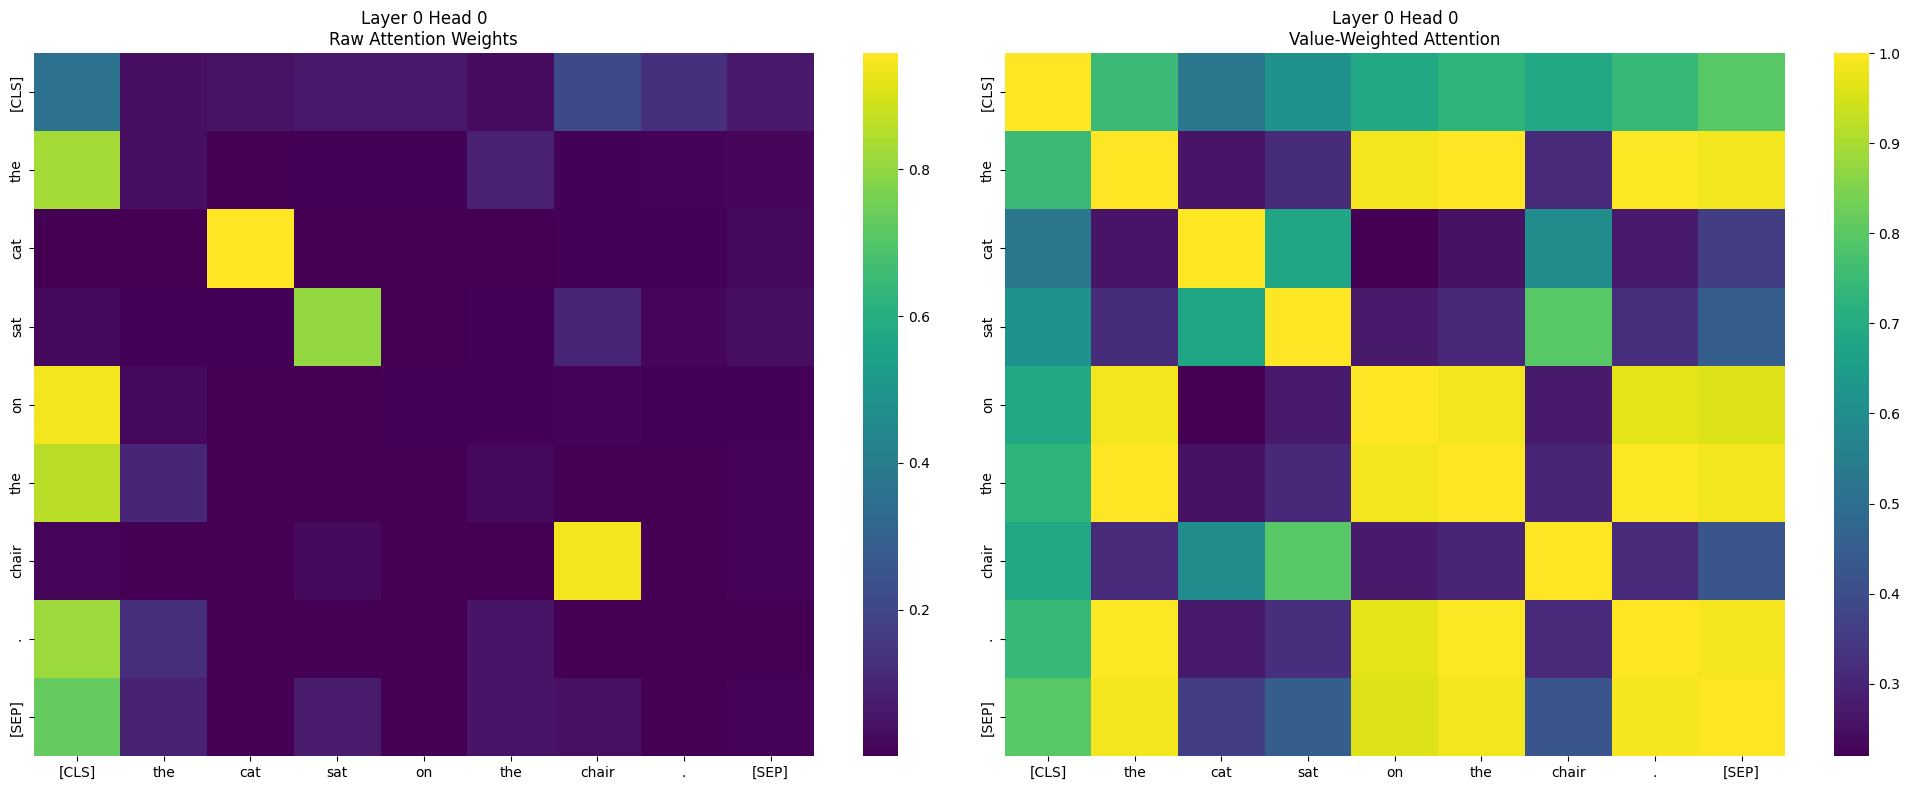

Layer 0, Head 0 max attention: 0.958


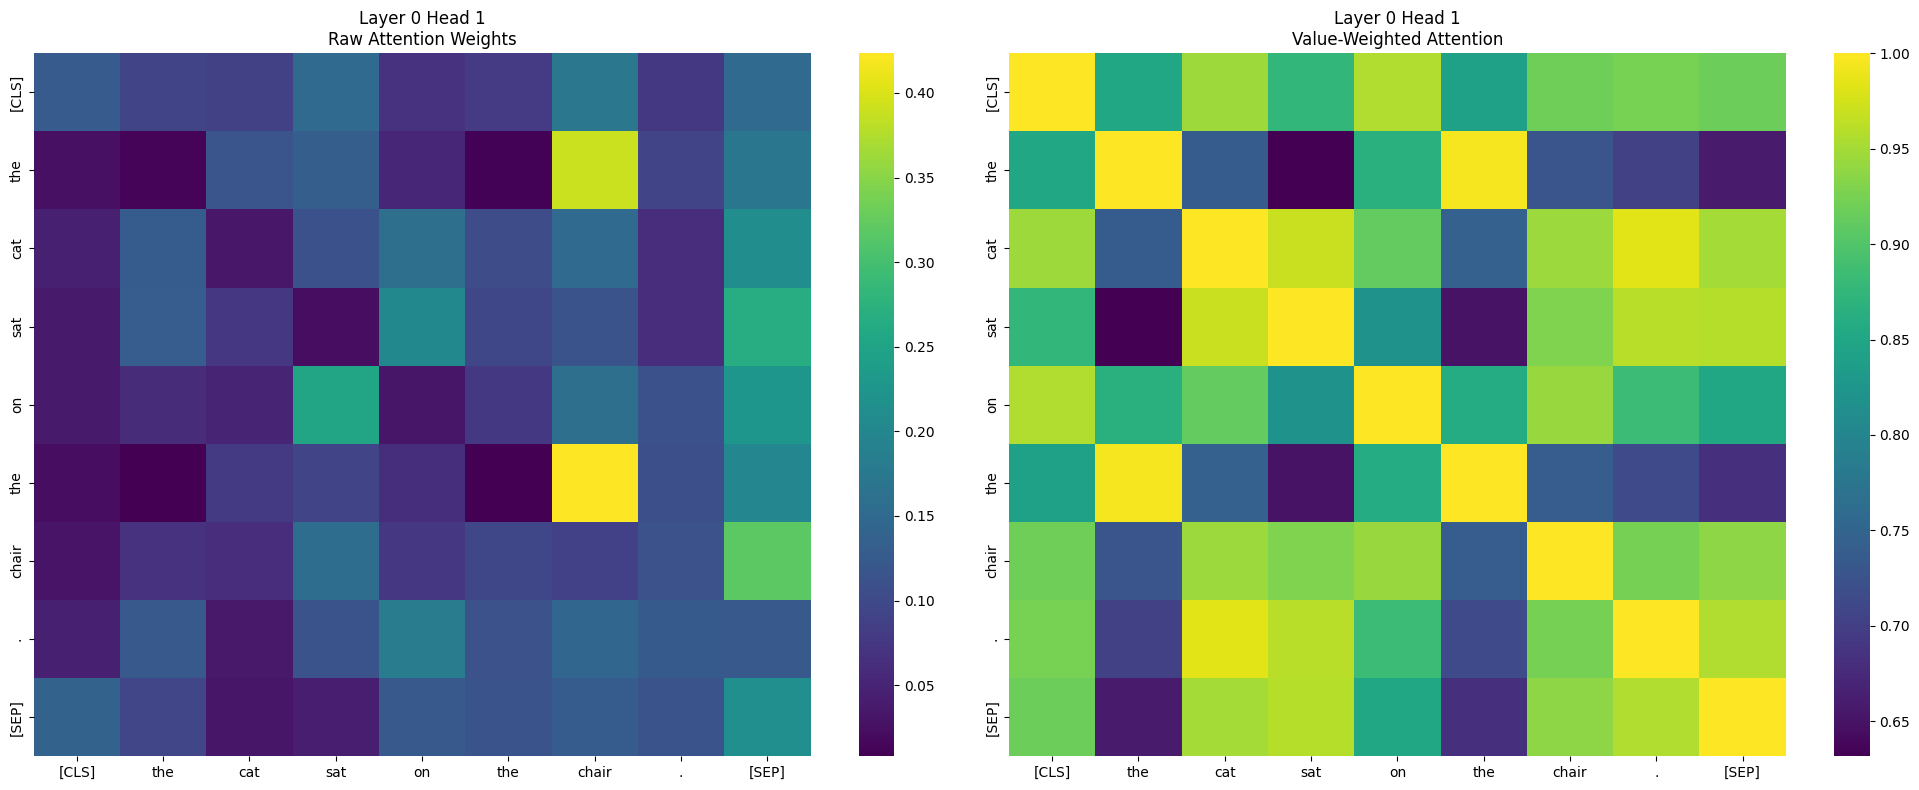

Layer 0, Head 1 max attention: 0.424


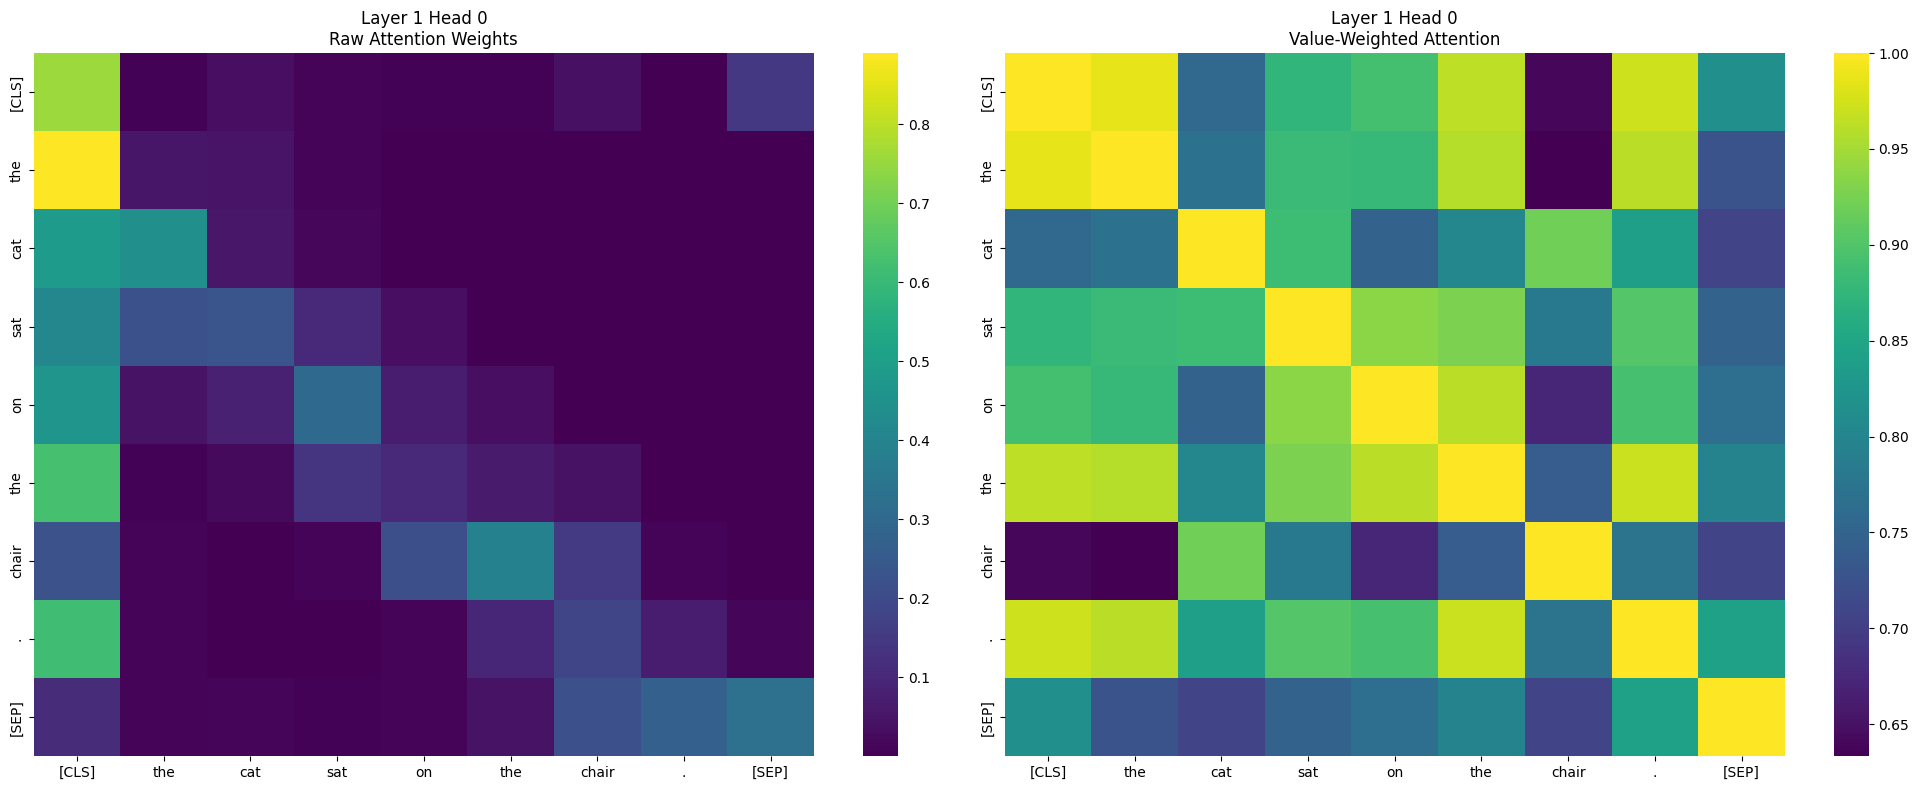

Layer 1, Head 0 max attention: 0.890


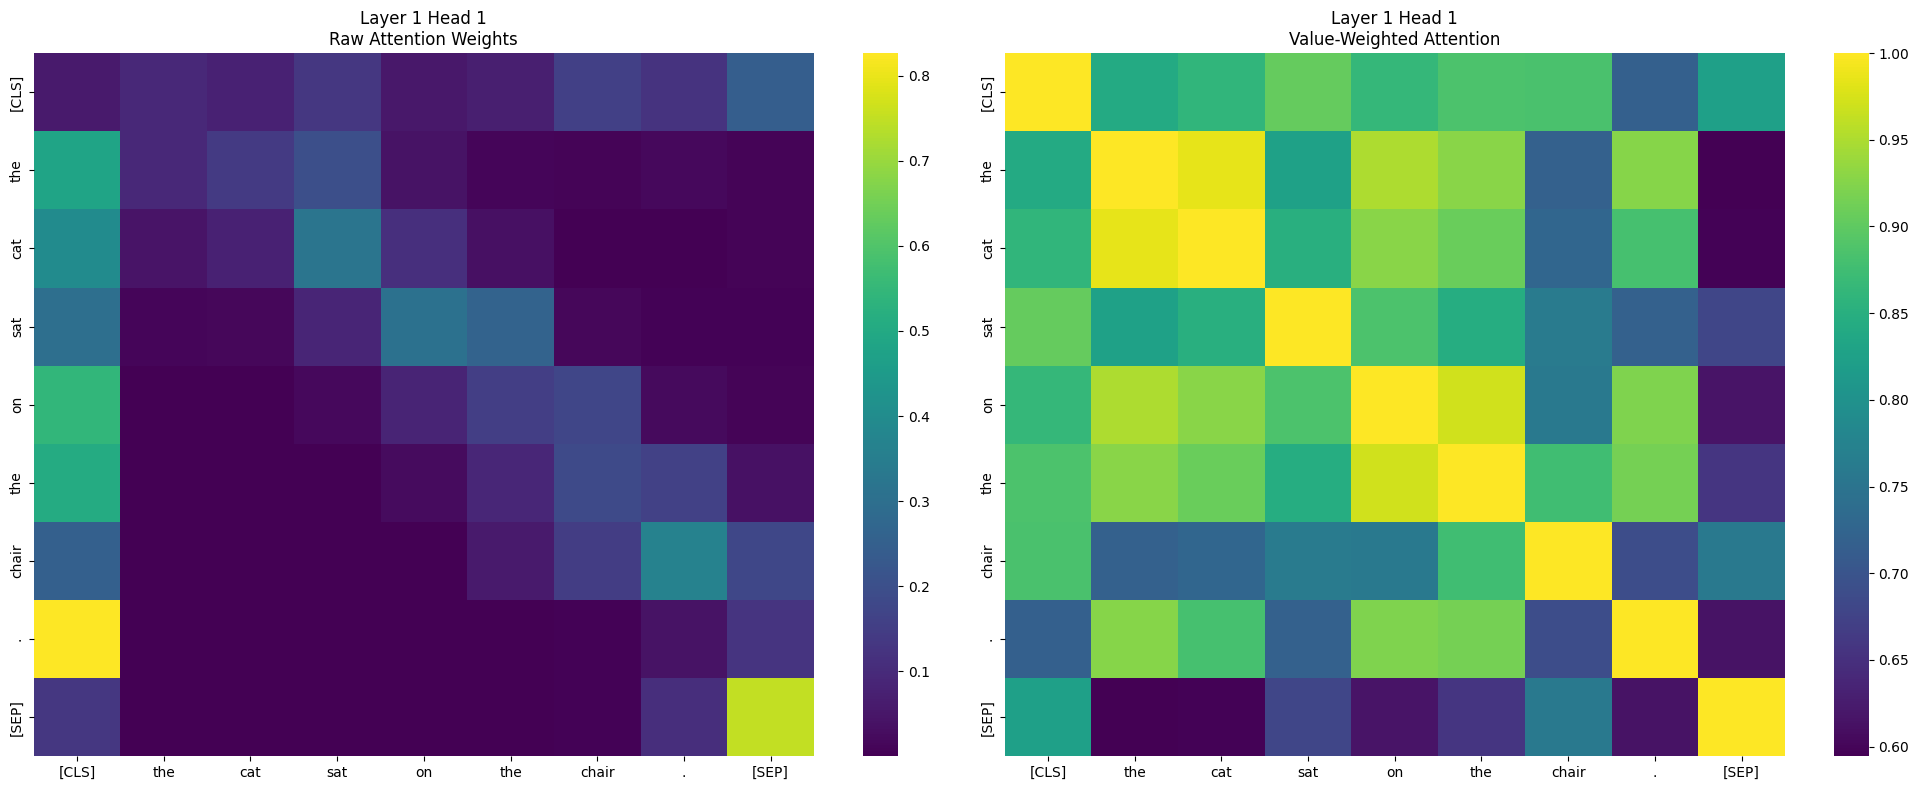

Layer 1, Head 1 max attention: 0.827


In [4]:
# Simple example sentence
text = "The cat sat on the chair."

# Get attention patterns
tokens, attention_data = probe.forward(text)

# Print tokens for reference
print("Tokens:", tokens)

# Look at each layer and head
for layer_idx in range(probe.num_layers):
    for head_idx in range(probe.num_heads):
        fig = probe.visualize_value_weighted_attention(
            layer_idx=layer_idx,
            head_idx=head_idx,
            tokens=tokens
        )
        plt.show()
        
        # Print the maximum attention value for this head
        attn_probs = attention_data[layer_idx]['attention_probs'][0, head_idx]
        print(f"Layer {layer_idx}, Head {head_idx} max attention: {attn_probs.max().item():.3f}")